# Biodiversity Project

This project is to analyse biodiveristy data about the National Parks Service, specifically the variety of species and their observations within specific parks.

Some of the questions this project will aim to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data Sources**

The data for this project was provided by [Codecademy](https://www.codecademy.com). The data for this project is inspired by real data but is mostly fictional

## Scoping

### Project Goals

The aim of this project is to act as a biodiversity analyst for the National Parks Service. Ultimately, we want to ensure the survival of at-risk species and maintain levels of biodiversity within the parks. The main objective as an analyst is to aid the National Parks Service by providing analysis on the characteristics of species, their conservation status and how those species' relationships with different parks. Some of the posed questions as stated previosuly are:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

For this project the data has been provided for us in the form of two `csv` files. The file `species_info.csv` has information about each species and `observations.csv` has information about the observations of species at different park locations.

### Analysis

Descriptive statistics and data visualisation techniques will be employed to better understand the data. Statistical inference will also be used to determine whether observed value are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between species
1. Conservation status of species
1. Cbservations of species in parks.

### Evaluation

Summarise data and figure out which questions were answered and which were not in correspondence to the goals of the project. Reflect and what was learned through the process of this project and if there were any limitations and improvements which could be made for future studies.

## Import Modules

Firtly, import the relevant modules and presets.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png2x')

## Load Data

To analyse the data using the pandas module we must load the data into dataframes.

### Species

The `species.csv` file contains info about the different species in the National Parks. The columns are as follows:

- category - The category of taxonomy for each species.
- scientific_name - The scientific name for each species in the format 'Genus species'.
- common_names - Commonly used names for that species.
- conservation_status - The conservation status of each species.

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Observations

The `observations.csv` file contains info about the observations of species at different National Parks in the past 7 days. The columns are as follows:

- species_name - The scientific name of each species.
- park_name - The name of the national park.
- observations - The number of observations of a species at a specific park in the past 7 days.

In [3]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data Characteristics

The `species` dataframe consists of 5824 rows and 4 columns and the `observations` dataframe consists of 23296 rows and 3 columns.

In [4]:
print(f'The dimensions of the species dataframe: {species.shape}')
print(f'The dimensions of the observations dataframe: {observations.shape}')

The dimensions of the species dataframe: (5824, 4)
The dimensions of the observations dataframe: (23296, 3)


## Explore Data

### Species 

Time to explore the data. It seems natural to first understand how many unique species we have data for. There are 5541 scientifically distinct species but 52824 rows of data in `species` this could indicate duplicate data.

In [5]:
print(f"Number of species: {species.scientific_name.nunique()}")

Number of species: 5541


There are 7 unique categories.

In [6]:
print(f'Number of categories: {species.category.nunique()}')
print(f'Categories: {species.category.unique()}')

Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We can also see the count of individual categories in the data. It looks like Vascular Plant is the most popular category in the data by far.

In [7]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

The `common_names` columns isn't that useful to us at the moment so the last column to explore is `conservation_status`. The majority of the column contains NaN values which means they do not have any concerns.

In [8]:
print(f"n/a values: {species.conservation_status.isna().sum()}")
print(species.groupby('conservation_status').size())

n/a values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


### Observations

First column to explore in the `observations` dataframe is `park_name`. There are 4 National Parks which the observation data pertains to.

In [9]:
print(f'Number of parks: {observations.park_name.nunique()}')
print(observations.park_name.unique())

Number of parks: 4
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Here are the total number of obseravtions over the past 7 days.

In [10]:
print(f"Number of observations: {observations.observations.sum()}")

Number of observations: 3314739


## Analysis

Next is to start analysis of the data. We will first clean the data in the `conservation_status` column as it contains a lot of NaN values. I will change all the NaN values to `Safe`.

In [11]:
species.fillna('Safe', inplace = True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Safe                  5633
Species of Concern     161
Threatened              10
dtype: int64

We can then investigate the distribution of conservation status amongst the different categories.

In [12]:
conservation_category = species[species.conservation_status != 'Safe']\
    .groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


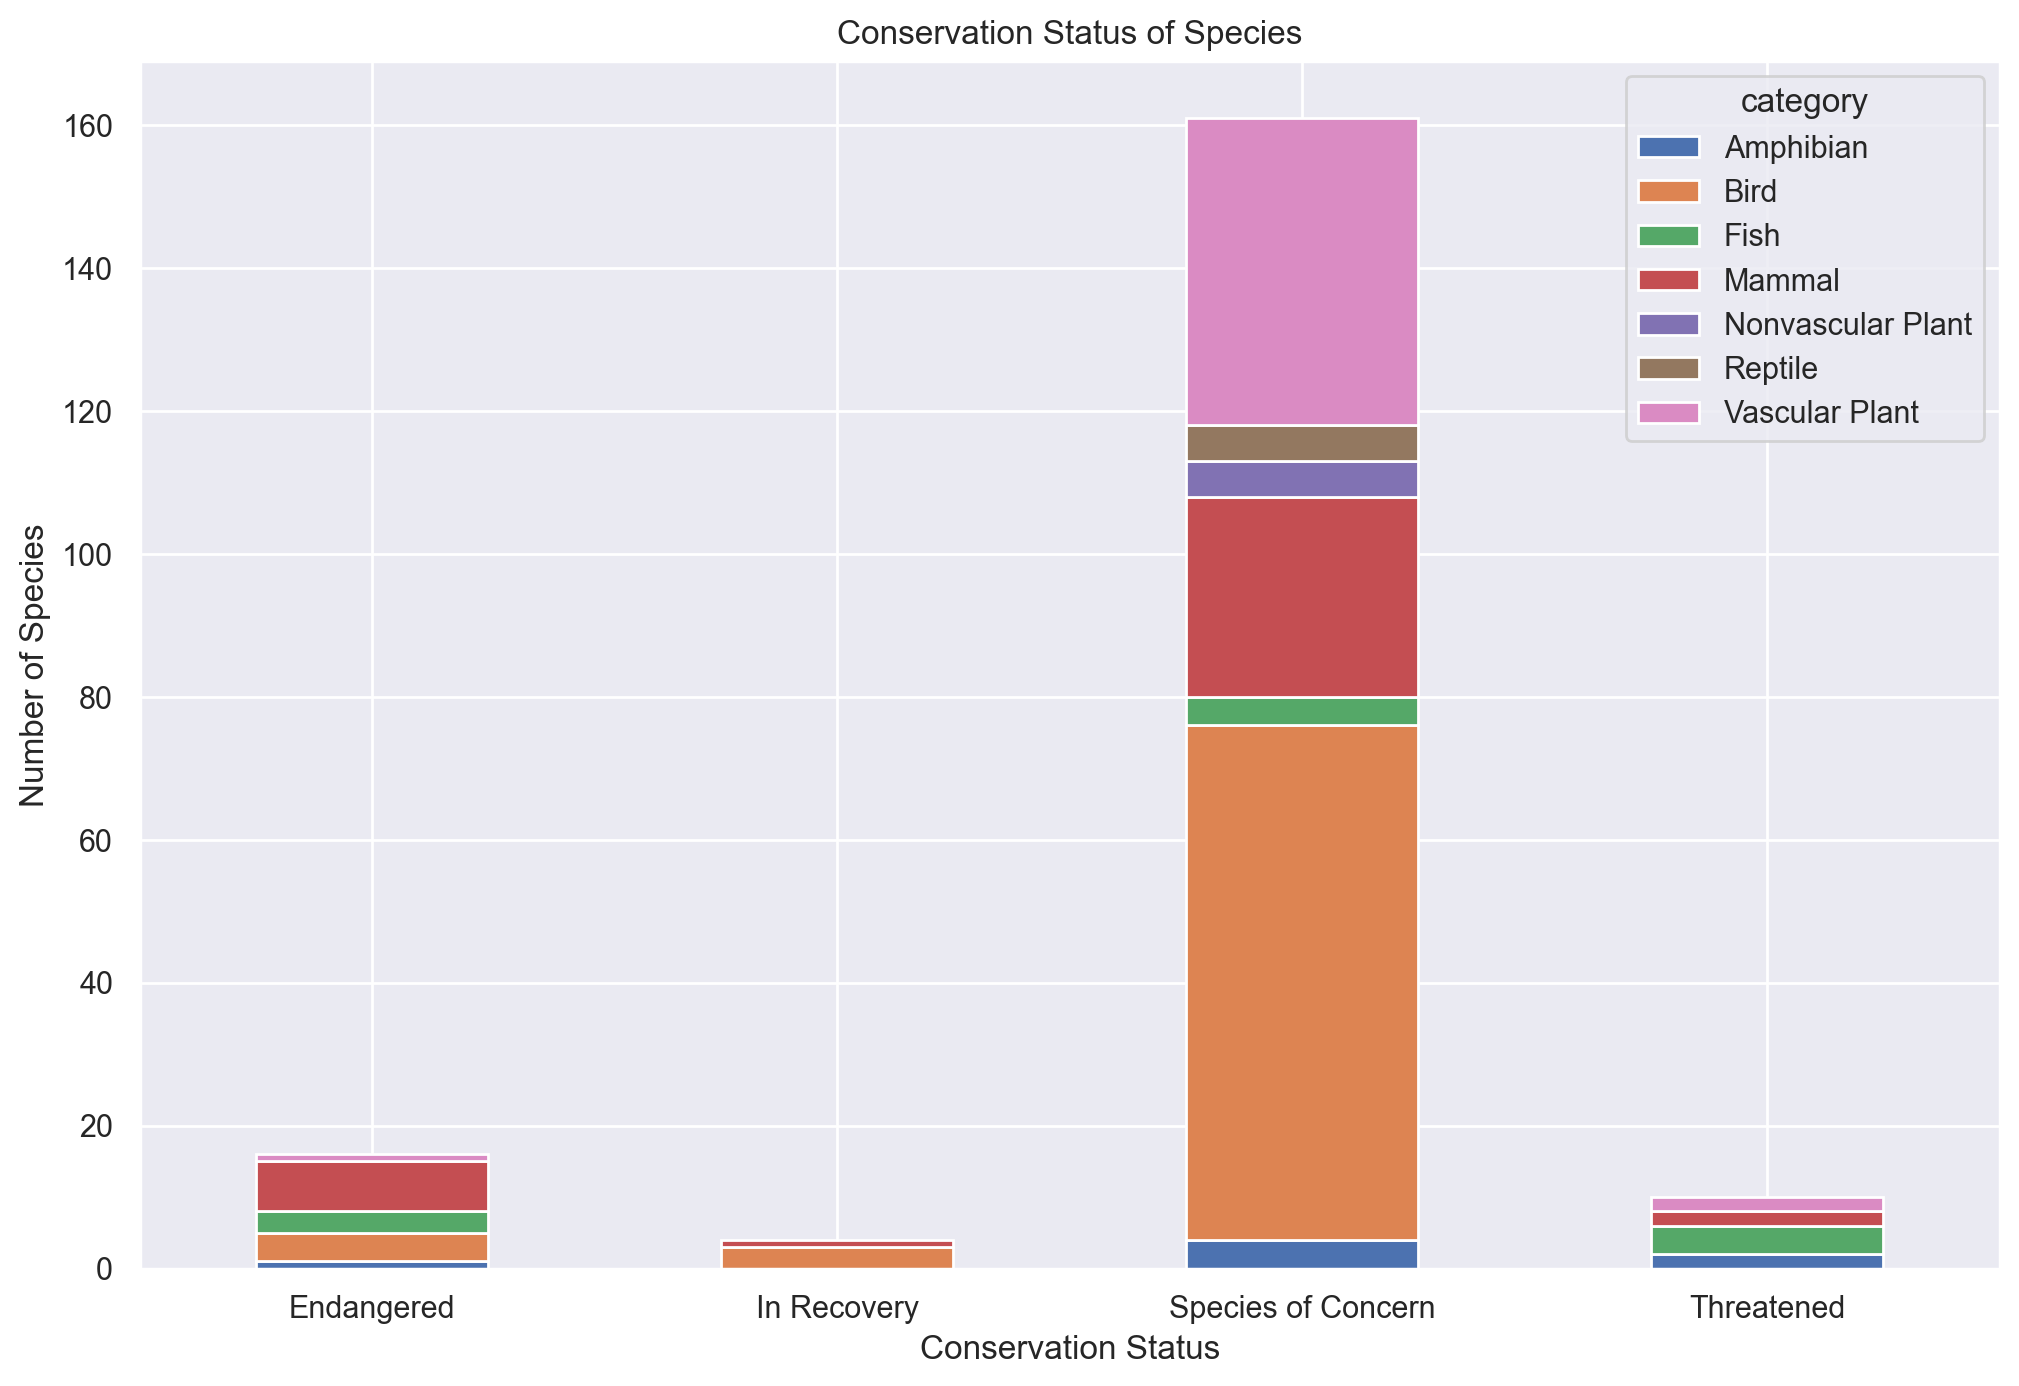

<Figure size 600x400 with 0 Axes>

In [13]:
ax = conservation_category.plot(kind = 'bar', stacked = True, figsize = (12,8))
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
plt.xticks(rotation = 0)
plt.title('Conservation Status of Species')
plt.show()
plt.clf()

The next question to answer is: are there species that are more likely to be endangered? To do this we can create a new column called `protected` which includes all species that do not have a conservation status of `Safe`.

In [14]:
species['protected'] = species.conservation_status != 'Safe'

We then group by `category` and `protected` to show the breakdown of each species and their protection status.

In [15]:
category_counts = species.groupby(['category', 'protected'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns = 'protected', index = 'category', values = 'scientific_name')\
    .reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


A better way to present this data would be to show the proportion of protection for each species.

In [16]:
category_counts['percent_protected'] = category_counts.protected /\
    (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Satistical Significance 

Since we have a dataframe consisting of frequencies of protection for different categories we are able to compute chi-squared significance tests. This section will consist of multiple chi-squared tests to see whether there is statistical significance in the protected status of species. To do these tests we must first create contingency tables.

The first contingency table will be between the potection status between mammals and birds. The `chi2_contingency` function returns multiple values, the second value is the p-value which we are interested in. The chi-squared test between birds and mammals returns a p-value of 0.69, this is above the conventional threshold 0.5, this shows that there is no statistic significance.

In [17]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146], [75, 413]]
print(chi2_contingency(contingency1)[1])


0.6875948096661336


The next pair is reptiles and mammals. This returns a p-value of 0.04 which is a lot smaller than 0.5, this can show statistical significance between reptiles and mammals. Mammals are shown to have a statistically significant higher rate of needed protection compared to reptiles.

In [18]:
contingency2 = [[30, 146], [5, 73]]
print(chi2_contingency(contingency2)[1])

0.03835559022969898


### Animals in Parks

This set of analysis will focus on the `common_names` column. We can use this to get an idea of the animals that are generally sighted and in need of protection in the parks. First we need to get a list of all the common names of animals from a specific category.

In [19]:
from itertools import chain
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text 

mammal_names = species[species.category == 'Mammal']\
    .common_names.apply(remove_punctuation)\
    .str.split().to_list()

mammal_names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

As you can see there are a lot of rows which have duplicate entries, so we need to work around this.

In [20]:
cleanrows = []

for i in mammal_names:
    i = list(dict.fromkeys(i))
    cleanrows.append(i)

cleanrows[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

Collapse the words into on list for use.

In [21]:
mammal_names_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanrows))
mammal_names_list[:5]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison']

Now we can count the number of occurences of each animal. From the created dataframe we can see that bats are the most prevalent animal in the parks.

In [22]:
mammal_count = []

for i in mammal_names_list:
    x = mammal_names_list.count(i)
    mammal_count.append((i,x))

pd.DataFrame(set(mammal_count), columns = ['Word', 'Count']).sort_values('Count', ascending = False).head()

,Word,Count
194,Bat,23
171,Shrew,18
122,Myotis,17
107,Mouse,16
8,Chipmunk,13


In the data there are a lot of different scientific names for bats. Now we need to figure out which rows of species are referring to bats. A boolean column similar to the `protected` column we made earlier called `bat` will be made.

In [23]:
species['bat'] = species.common_names.str.contains(r'\bBat\b', regex = True)
species.head()

,category,scientific_name,common_names,conservation_status,protected,bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Safe,False,False
1,Mammal,Bos bison,"American Bison, Bison",Safe,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Safe,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Safe,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Safe,False,False


In [24]:
species[species.bat]

,category,scientific_name,common_names,conservation_status,protected,bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Safe,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Safe,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,Safe,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,Safe,False,True


Next we can merge the `bat` column into `observations` so we can create a dataframe with the obseravtions of bots across the 4 parks.

In [25]:
bat_observations = observations.merge(species[species.bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,protected,bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Safe,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Total bat observations across all species at each park is shown in the table below. 

In [26]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Next we can make a comparison between protected and not protected bats in each of the parks.

In [27]:
obs_by_park = bat_observations.groupby(['park_name', 'protected']).observations.sum().reset_index()
obs_by_park

,park_name,protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


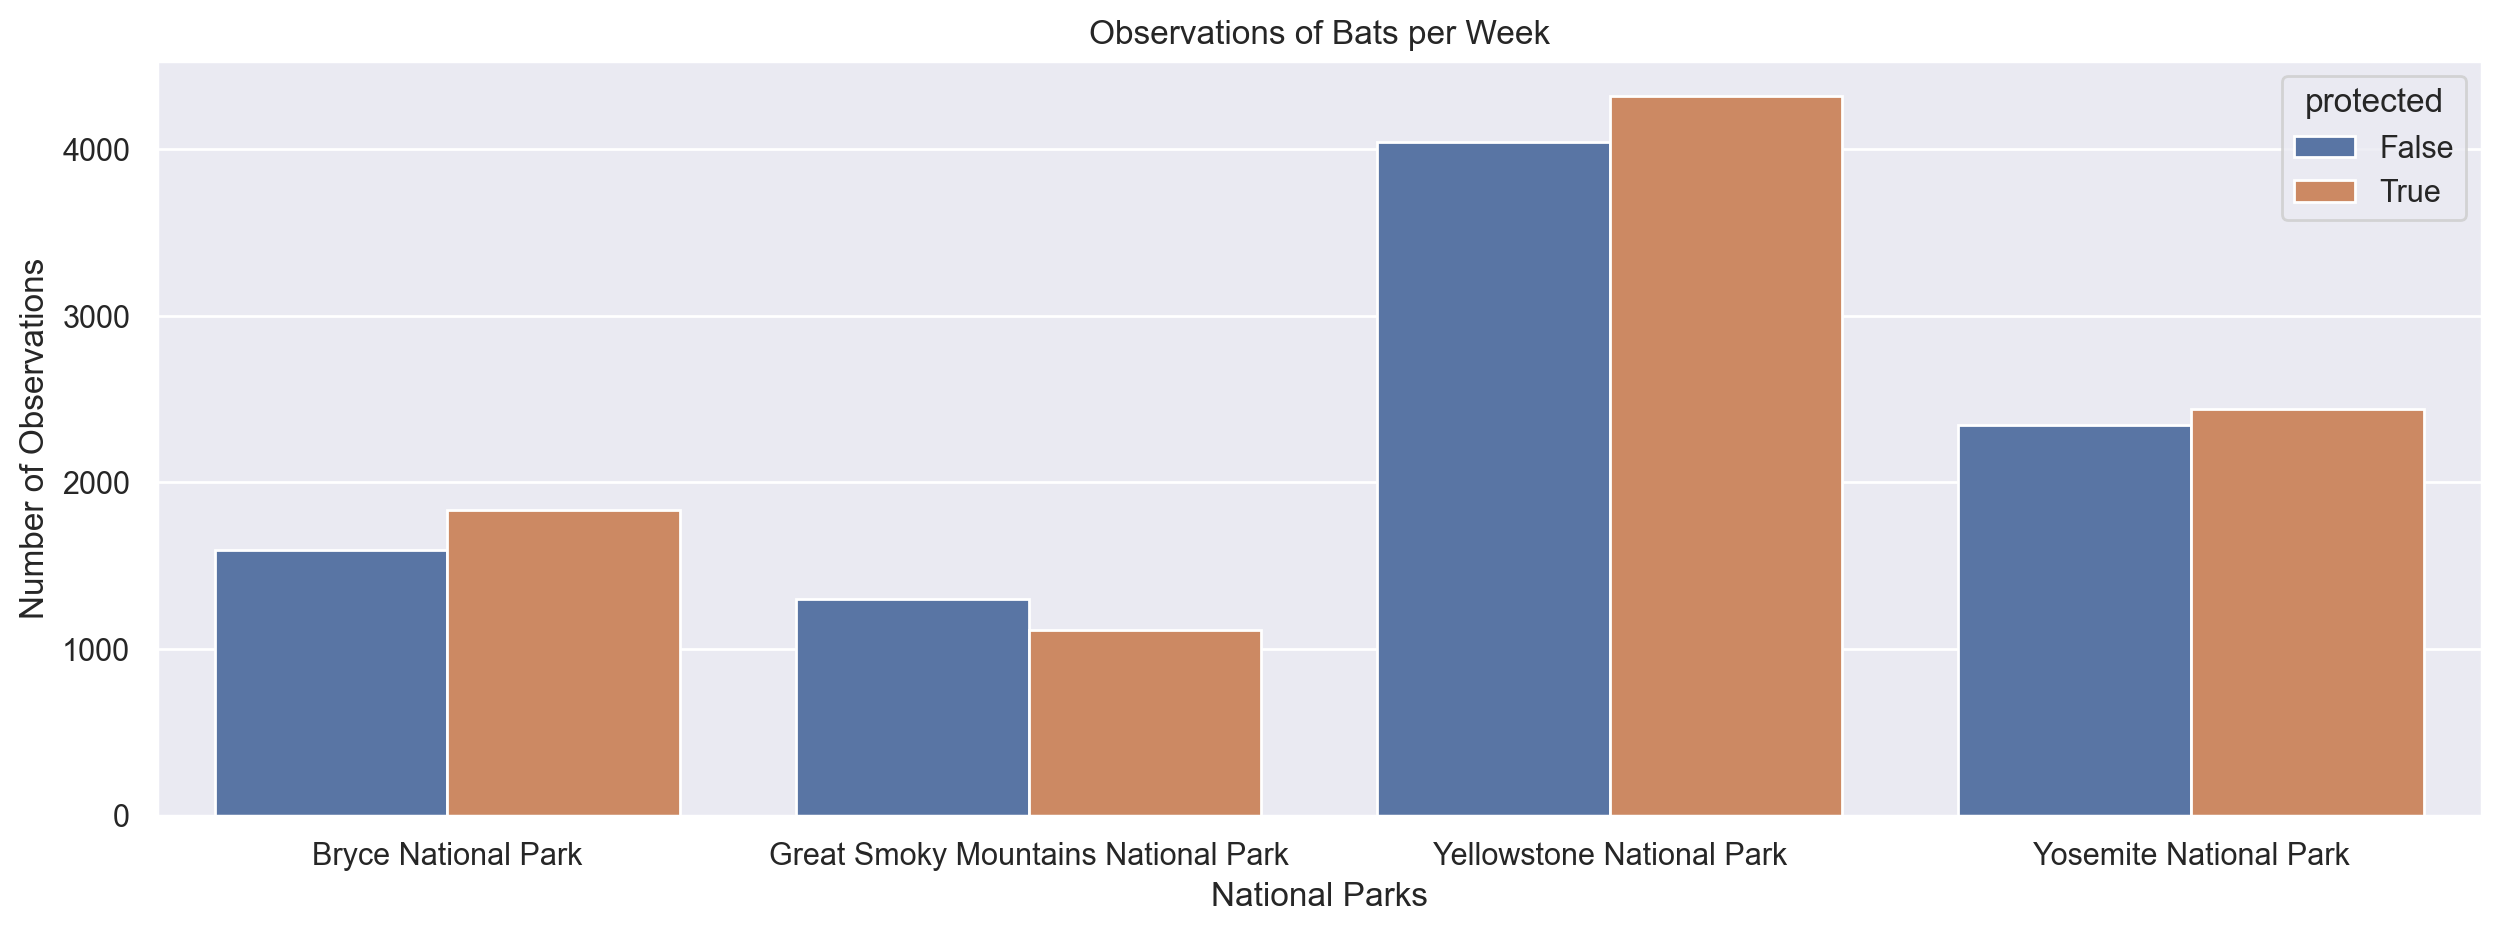

<Figure size 600x400 with 0 Axes>

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x = obs_by_park.park_name, y = obs_by_park.observations, hue = obs_by_park.protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()
plt.clf()

## Conclusions

This project was able to make data visualizations and inferences about the various species in the National Parks given in this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - The study found that bats were observed the most number of times and they were most likely to be found in Yellowstone National Park.


## Further Research

This dataset only comprised of data for 7 days, if data could be recorded over a longer period of time we could investigate the change in biodiversity over time much better. Other things which we could measure is the area of each park and the location of each observation. This would be a good way to investigate the spread of biodiversity within the specific parks.